<a href="https://colab.research.google.com/github/nikhilpalarapu/ML-Projects/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# excel_file_path = '/content/
data = pd.read_excel('/data set.xlsx')

In [ ]:
data.head()

,rx,ry,rp,tx,ty,tp
0,6,11,-64.4678,383,2815,43.0102
1,6,21,-64.4525,383,2815,43.0102
2,6,31,-64.4219,383,2815,43.0102
3,6,41,-64.3912,383,2815,43.0102
4,6,51,-64.3604,383,2815,43.0102


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729189 entries, 0 to 729188
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rx      729189 non-null  int64  
 1   ry      729189 non-null  int64  
 2   rp      729189 non-null  float64
 3   tx      729189 non-null  int64  
 4   ty      729189 non-null  int64  
 5   tp      729189 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 33.4 MB


In [ ]:
data.describe()

,rx,ry,rp,tx,ty,tp
count,729189.000000,729189.00000,729189.000000,729189.000000,729189.000000,729189.000000
mean,1196.000000,1701.00000,-59.672084,1148.555556,1652.333333,45.187411
std,689.928006,978.60512,8.334003,607.613435,994.510947,1.662821
min,6.000000,11.00000,-90.838400,383.000000,422.000000,41.760900
25%,596.000000,851.00000,-65.602600,465.000000,456.000000,44.771200
50%,1196.000000,1701.00000,-60.199300,1130.000000,1663.000000,45.440600
75%,1796.000000,2551.00000,-54.546700,1892.000000,2815.000000,46.532100
max,2386.000000,3391.00000,-21.253600,1926.000000,2925.000000,46.989700


In [ ]:
# Extract features and target variable
tx = data['tx'].values
ty = data['ty'].values
rx = data['rx'].values
ry = data['ry'].values
tp = data['tp'].values
rp = data['rp'].values

In [ ]:
# Normalize the data
tx_mean, tx_std = tx.mean(), tx.std()
ty_mean, ty_std = ty.mean(), ty.std()
rx_mean, rx_std = rx.mean(), rx.std()
ry_mean, ry_std = ry.mean(), ry.std()
tp_mean, tp_std = tp.mean(), tp.std()

tx_normalized = (tx - tx_mean) / tx_std
ty_normalized = (ty - ty_mean) / ty_std
rx_normalized = (rx - rx_mean) / rx_std
ry_normalized = (ry - ry_mean) / ry_std
tp_normalized = (tp - tp_mean) / tp_std

In [ ]:
# Calculate Euclidean distance
data['distance'] = np.sqrt((data['tx'] - data['rx'])**2 + (data['ty'] - data['ry'])**2)
print(data['distance'].mean())

1497.8858068213267


In [ ]:
# Normalize the distance data
print(data['distance'].mean())
print(data['distance'].std())
distance_mean = data['distance'].mean()
distance_std = data['distance'].std()

# Normalize the distance
data['distance_normalized'] = (data['distance'] - distance_mean) / distance_std

# Drop the intermediate distance column if it's no longer needed
data.drop(columns=['distance'], inplace=True)
data.head()

1497.8858068213267
743.5517475293524


,rx,ry,rp,tx,ty,tp,distance_normalized
0,6,11,-64.4678,383,2815,43.0102,1.790521
1,6,21,-64.4525,383,2815,43.0102,1.777192
2,6,31,-64.4219,383,2815,43.0102,1.763864
3,6,41,-64.3912,383,2815,43.0102,1.750537
4,6,51,-64.3604,383,2815,43.0102,1.737211


In [ ]:
# Combine normalized features
X = data[['tp','distance_normalized']]
y = data['rp']


In [ ]:
X.head()

,tp,distance_normalized
0,43.0102,1.790521
1,43.0102,1.777192
2,43.0102,1.763864
3,43.0102,1.750537
4,43.0102,1.737211


In [ ]:
positive_count = (data['rp'] > 0).sum()
print(positive_count)

0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a more complex neural network
model = models.Sequential([ layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(1)  # Output layer for regression
])

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
# Define early stopping with patience
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
18230/18230 [==============================] - 96s 5ms/step - loss: 1816.0380 - val_loss: 48.2945
Epoch 2/5
18230/18230 [==============================] - 89s 5ms/step - loss: 234.9598 - val_loss: 30.0715
Epoch 3/5
18230/18230 [==============================] - 91s 5ms/step - loss: 215.1446 - val_loss: 32.5527
Epoch 4/5
18230/18230 [==============================] - 93s 5ms/step - loss: 205.3662 - val_loss: 32.0745
Epoch 5/5
18230/18230 [==============================] - 100s 6ms/step - loss: 196.6705 - val_loss: 30.9992


In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")
scale_factor = 0.2

4558/4558 [==============================] - 11s 2ms/step - loss: 30.9992
Mean Squared Error on Test Set: 30.999229431152344


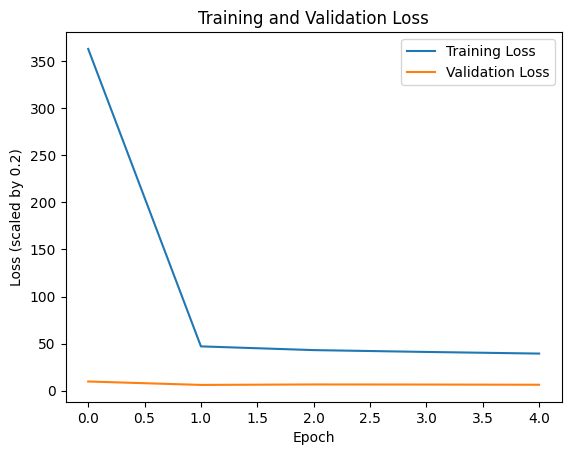

In [ ]:
# Plot training and validation loss with scaled values
plt.plot(np.array(history.history['loss']) * scale_factor, label='Training Loss')
plt.plot(np.array(history.history['val_loss']) * scale_factor, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel(f'Loss (scaled by {scale_factor})')
plt.legend()
plt.show()

In [ ]:
model.summary()
print(X_test[:5])
print(model.predict(X_test).flatten())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               384       
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_13 (Dropout)        (None, 64)               